In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#importing sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
#Importing the dataset csv
data = pd.read_csv("/content/weatherAUS.csv")

In [3]:
#Previewing the dataset
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


This dataset contains about 10 years of daily weather observations from different locations across Australia. 

For this project, I need to use the data to predict whether or not it will rain the next day. From the table above, I know that there are 23 attributes including the target variable 'RainTomorrow'.

In [4]:
#Getting more information from the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

There are a total of 145,460 entries in the dataset. 

There are missing values

This dataset includes 16 numeric and 7 categorical values. RainToday and RainTomorrow are object (Yes/No), I will convert them to 1/0
I chose to fill in the missing values in RainTomorrow since it is a considerably small set of missing values (2%).

In [5]:
#Dropping date column since I only need to predict future weather.
data.drop(['Date'], axis=1, inplace=True)

In [6]:
#Filling in the missing value of RainTomorrow using mode
data['RainTomorrow']=data['RainTomorrow'].fillna(data['RainTomorrow'].mode()[0])

In [7]:
#Converting (Yes/No) into binary (1/0) using LabelEncoder
le = LabelEncoder()
data['RainTomorrow'] = le.fit_transform(data['RainTomorrow'])
data['RainToday'] = le.fit_transform(data['RainToday'])
#Encoding other categorical Variables
data['Location'] = le.fit_transform(data['Location'])
data['WindDir9am'] = le.fit_transform(data['WindDir9am'])
data['WindDir3pm'] = le.fit_transform(data['WindDir3pm'])
data['WindGustDir'] = le.fit_transform(data['WindGustDir'])

In [8]:
#Checking the table to see if the encoding is successful
data.head(5)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,13.4,22.9,0.6,NaN,NaN,13,44.0,13,14,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0
1,2,7.4,25.1,0.0,NaN,NaN,14,44.0,6,15,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0
2,2,12.9,25.7,0.0,NaN,NaN,15,46.0,13,15,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0
3,2,9.2,28.0,0.0,NaN,NaN,4,24.0,9,0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0
4,2,17.5,32.3,1.0,NaN,NaN,13,41.0,1,7,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


In [9]:
#Checking for null values
data.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir          0
WindGustSpeed    10263
WindDir9am           0
WindDir3pm           0
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday            0
RainTomorrow         0
dtype: int64

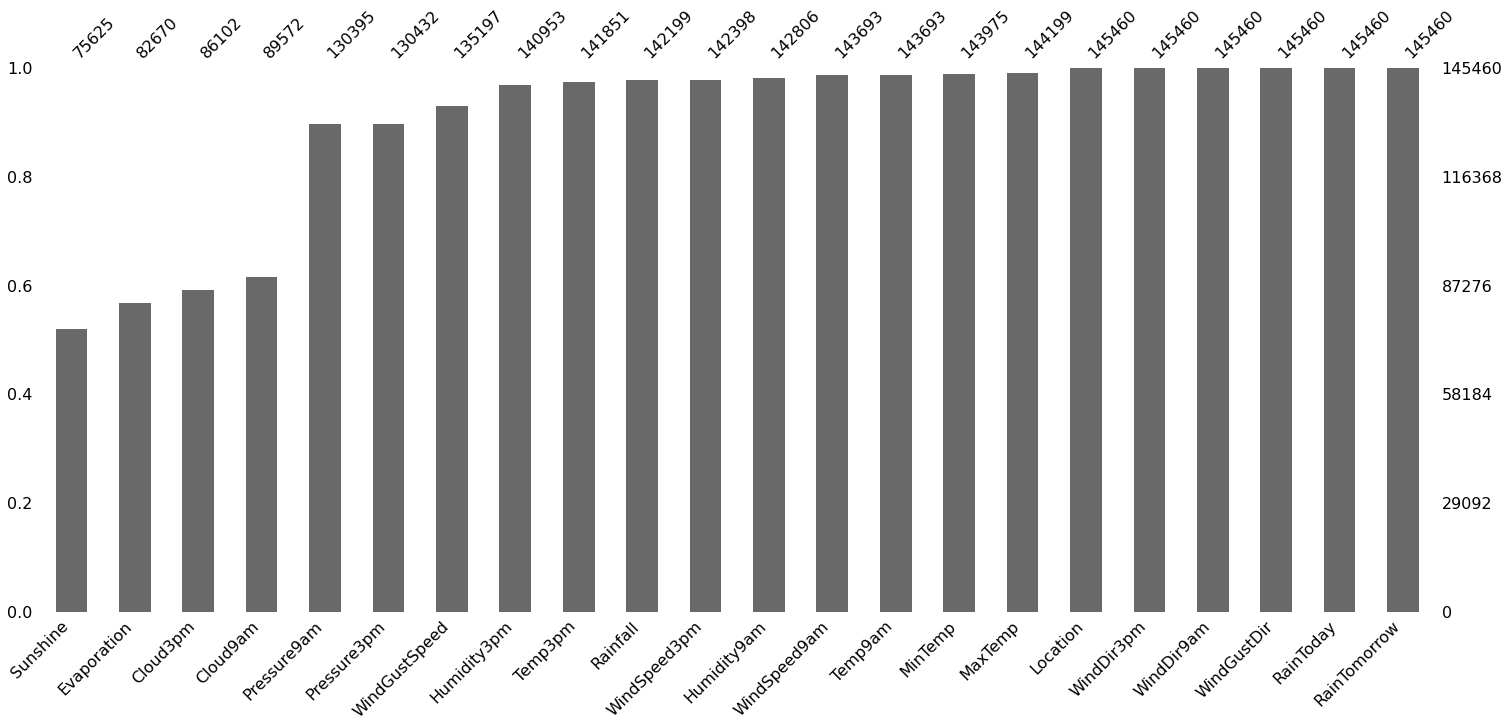

In [10]:
#Using a bar chart to visualize the missing data
import missingno as msno
msno.bar(data, sort='ascending')
#ref: https://towardsdatascience.com/visualizing-missing-values-in-python-is-shockingly-easy-56ed5bc2e7ea

From the count on null values and bar chart above, it is revealed that 'Sunshine', 'Evaporation', 'Cloud3pm' and 'Cloud9am' has a lot of null values.

In [11]:
#Dropping the columns with too many missing data since they are ineffective for predicting the rain
data=data.drop(['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am'], axis=1)
data.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [12]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,2,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,2,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,2,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  int64  
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   WindGustDir    145460 non-null  int64  
 5   WindGustSpeed  135197 non-null  float64
 6   WindDir9am     145460 non-null  int64  
 7   WindDir3pm     145460 non-null  int64  
 8   WindSpeed9am   143693 non-null  float64
 9   WindSpeed3pm   142398 non-null  float64
 10  Humidity9am    142806 non-null  float64
 11  Humidity3pm    140953 non-null  float64
 12  Pressure9am    130395 non-null  float64
 13  Pressure3pm    130432 non-null  float64
 14  Temp9am        143693 non-null  float64
 15  Temp3pm        141851 non-null  float64
 16  RainToday      145460 non-null  int64  
 17  RainTomorrow   145460 non-nul

In [14]:
#Filling in missing values for the variables with mean
data['MinTemp']=data['MinTemp'].fillna(data['MinTemp'].mean())
data['MaxTemp']=data['MaxTemp'].fillna(data['MaxTemp'].mean())
data['Rainfall']=data['Rainfall'].fillna(data['Rainfall'].mean())
data['WindGustSpeed']=data['WindGustSpeed'].fillna(data['WindGustSpeed'].mean())
data['WindSpeed9am']=data['WindSpeed9am'].fillna(data['WindSpeed9am'].mean())
data['WindSpeed3pm']=data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].mean())
data['Humidity9am']=data['Humidity9am'].fillna(data['Humidity9am'].mean())
data['Humidity3pm']=data['Humidity3pm'].fillna(data['Humidity3pm'].mean())
data['Pressure9am']=data['Pressure9am'].fillna(data['Pressure9am'].mean())
data['Pressure3pm']=data['Pressure3pm'].fillna(data['Pressure3pm'].mean())
data['Temp9am']=data['Temp9am'].fillna(data['Temp9am'].mean())
data['Temp3pm']=data['Temp3pm'].fillna(data['Temp3pm'].mean())

In [15]:
#Checking for null values again
data.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

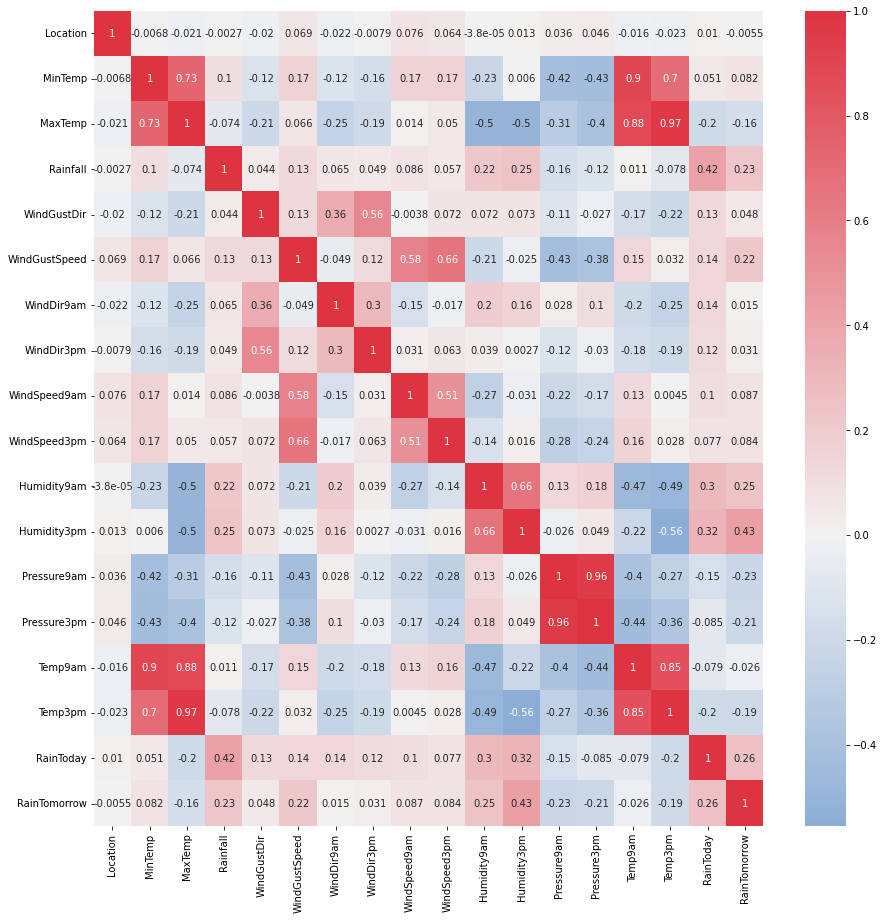

In [16]:
#Using corrmat to visualize and find out which attribute will be correlated to RainTomorrow
plt.figure(figsize=(15,15))
corrmat = data.corr()
cmap = sns.diverging_palette(250, 10, s=80, l=50, n=8, as_cmap=True)
sns.heatmap(corrmat, annot=True, cmap=cmap, center=0)

From the correlation heatmap above, I can observe that Humidity3pm (0.45), RainToday (0.31), Humidity9am (0.26) and Rainfall (0.24) has the largest correlation coefficients to RainTomorrow.

In [17]:
#Defining features and target
X = data.drop('RainTomorrow', axis=1)
y = data['RainTomorrow']
print(y.value_counts())

0    113583
1     31877
Name: RainTomorrow, dtype: int64


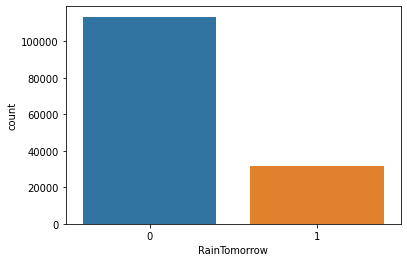

In [18]:
#countplot to visualize the results of Yes/No in target variable
sns.countplot(x = data["RainTomorrow"])

As shown in the countplot, there is a class imbalance with 0 and 1. For this project, I will use oversampling since this dataset since the dataset is fairly small. Due to missing values in RainTomorrow, the encoder has labelled the null values to 2.

Ref: https://developers.google.com/machine-learning/glossary

In [19]:
#Train test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
#Using SMOTE for sampling
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train_up, y_train_up = sm.fit_resample(X_train, y_train)
print(y_train_up.value_counts())

1    90911
0    90911
Name: RainTomorrow, dtype: int64


In [21]:
#Training the model
model = LogisticRegression(max_iter= 500)
model.fit(X_train_up, y_train_up)
y_pred = model.predict(X_test)
#Scoring the accuracy of LogisticRegression
score = accuracy_score(y_test, y_pred)
ps = precision_score(y_test,y_pred)
#Printing the accuracy
print('Accuracy :', score)
print('F Score :', f1_score(y_test, y_pred))
print('Precision Score :', ps)

Accuracy : 0.77419909253403
F Score : 0.5913021837864743
Precision Score : 0.49228219206464313


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
#Training the model with RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_up, y_train_up)
y_pred = model_rf.predict(X_test)
score = accuracy_score(y_test, y_pred)
ps = precision_score(y_test,y_pred)
print('Accuracy :', score)
print('F Score :', f1_score(y_test, y_pred))
print('Precision Score :', ps)

Accuracy : 0.8407465970026125
F Score : 0.6320387578429036
Precision Score : 0.6447901474639443


In [25]:
#Using KNN to train the model
knn = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski')
knn.fit(X_train_up, y_train_up)
y_pred = knn.predict(X_test)
score = accuracy_score(y_test, y_pred)
ps = precision_score(y_test,y_pred)
print('Accuracy :', score)
print('F Score :', f1_score(y_test, y_pred))
print('Precision Score :', ps)

Accuracy : 0.7799395022686649
F Score : 0.5888246628131021
Precision Score : 0.5009836065573771


In [26]:
#Using Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train_up, y_train_up)
y_pred = gb.predict(X_test)
score = accuracy_score(y_test, y_pred)
ps = precision_score(y_test, y_pred)
print('Accuracy :', score)
print('F Score :', f1_score(y_test, y_pred))
print('Precision Score :', ps)

Accuracy : 0.8160318988037949
F Score : 0.6168933428775949
Precision Score : 0.5707284768211921
